<a href="https://colab.research.google.com/github/Kanka-goswami/IISc_CDS_2302064/blob/main/Kanka_Copy_of_M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

## Grading = 10 Points

### Download the dataset

In [196]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [197]:
!pip install pandas==1.3.5

In [198]:
!pip install xverse

### Import Neccesary Packages

In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [200]:
original_df = pd.read_csv('GiveMeSomeCredit.csv')

In [201]:
original_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [202]:
numeric_vars = ['RevolvingUtilizationOfUnsecuredLines',
                'age', 'DebtRatio', 'MonthlyIncome',
                'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents'
                ]

#### Describe the all statistical properties of the train dataset

In [203]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

There are 11 columns,

In [204]:
original_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [205]:
original_df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

### Pre-processing (1 point)

#### Remove unwanted columns

In [206]:
X_df = original_df.drop(columns= ['Unnamed: 0','SeriousDlqin2yrs'], axis=1).copy()
y_df =original_df['SeriousDlqin2yrs'].copy()

In [207]:
X_num = X_df[numeric_vars].copy()
X_cat = X_df.drop(columns= numeric_vars, axis=1).copy()

In [208]:
cat_column_dict = dict(map(lambda x: x, enumerate(X_cat.columns)))
num_column_dict = dict(map(lambda x: x, enumerate(X_num.columns)))
print(cat_column_dict)
print(num_column_dict)

{0: 'NumberOfTime30-59DaysPastDueNotWorse', 1: 'NumberOfTimes90DaysLate', 2: 'NumberRealEstateLoansOrLines', 3: 'NumberOfTime60-89DaysPastDueNotWorse'}
{0: 'RevolvingUtilizationOfUnsecuredLines', 1: 'age', 2: 'DebtRatio', 3: 'MonthlyIncome', 4: 'NumberOfOpenCreditLinesAndLoans', 5: 'NumberOfDependents'}


#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [209]:
X_num.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfDependents                       3924
dtype: int64

##### Handling outliers

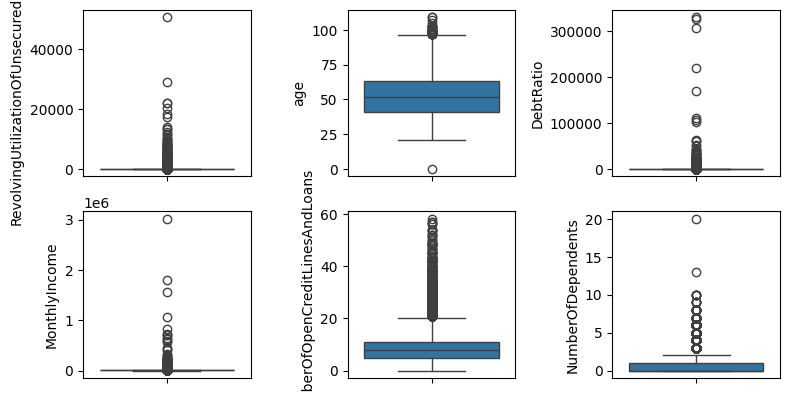

In [210]:
# Visualizing outliers Numerical
plt.figure(figsize=(8,6))

for i,col in num_column_dict.items():
    plt.subplot(3,3,i + 1)
    sns.boxplot(y=col, data= X_num)
    plt.ylabel(col)

plt.tight_layout()

plt.show()

In [211]:
# removing outliers
def CustomSampler_IQR (X):
    '''Returns the indices of the rows lying beyond Q1 and Q3
    '''
    features = X.columns
    df = X.copy()

    indices = [x for x in df.index]
    out_indexlist = []

    for col in features:

        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)

        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off

        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values
        out_indexlist.extend(outliers_index)

    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))

    clean_data = np.setdiff1d(indices,out_indexlist)

    return clean_data

In [212]:
X_num_outlier_index = CustomSampler_IQR(X_num)
X_num_outlier_removed = X_num.loc[X_num_outlier_index].copy()
X_cat_outlier_removed = X_cat.loc[X_num_outlier_index].copy()
y_df = y_df.loc[X_num_outlier_index]
print(X_df.shape)
print(X_num_outlier_removed.shape, X_cat_outlier_removed.shape, y_df.shape)

(150000, 10)
(99544, 6) (99544, 4) (99544,)


In [213]:
# resetting indices
X_num_outlier_removed= X_num_outlier_removed.reset_index(drop= True)
X_cat_outlier_removed = X_cat_outlier_removed.reset_index(drop= True)
y_df = y_df.reset_index(drop= True)

In [214]:
X_num_outlier_removed.describe()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
count,99544.000000,99544.000000,99544.000000,97749.000000,99544.000000,99071.000000
mean,0.327634,51.826157,0.331736,5740.085228,8.084556,0.547638
std,0.353465,15.167442,0.289549,3151.066379,4.400149,0.756593
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030508,40.000000,0.122143,3333.000000,5.000000,0.000000
50%,0.165991,52.000000,0.279872,5100.000000,8.000000,0.000000
75%,0.577287,63.000000,0.459302,7622.000000,11.000000,1.000000
max,1.352159,96.000000,1.906765,15520.000000,20.000000,2.000000


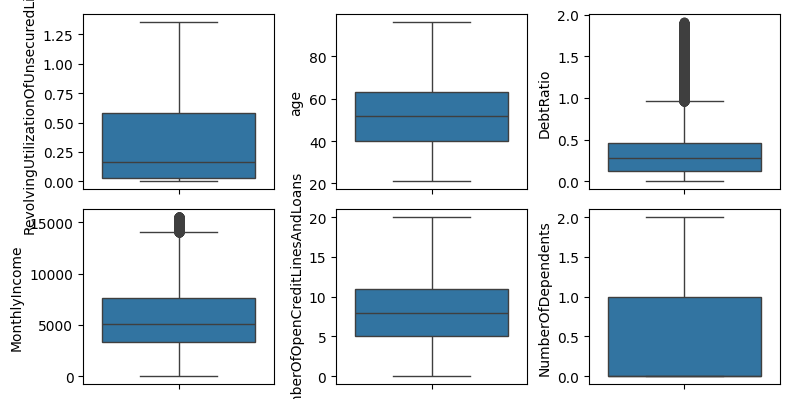

In [215]:
# Boxplots after outliers removed

plt.figure(figsize=(8,6))

for i,col in num_column_dict.items():
    plt.subplot(3,3,i + 1)
    sns.boxplot(y=col, data= X_num_outlier_removed)
    plt.ylabel(col)

plt.tight_layout()

plt.show()

In [216]:
# checking for null values
X_num_outlier_removed.isnull().sum()

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
DebtRatio                                  0
MonthlyIncome                           1795
NumberOfOpenCreditLinesAndLoans            0
NumberOfDependents                       473
dtype: int64

In [217]:
# Imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')
imputer.fit(X_num_outlier_removed)
imputer.statistics_

array([1.65991314e-01, 5.20000000e+01, 2.79871695e-01, 5.10000000e+03,
       8.00000000e+00, 0.00000000e+00])

In [218]:
X_num = imputer.transform(X_num_outlier_removed)
X_num_clean = pd.DataFrame(X_num, columns= X_num_outlier_removed.columns,
                            index= X_num_outlier_removed.index)

In [219]:
# checking null valies in categorical variables
X_cat_outlier_removed.isnull().sum()

NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
dtype: int64

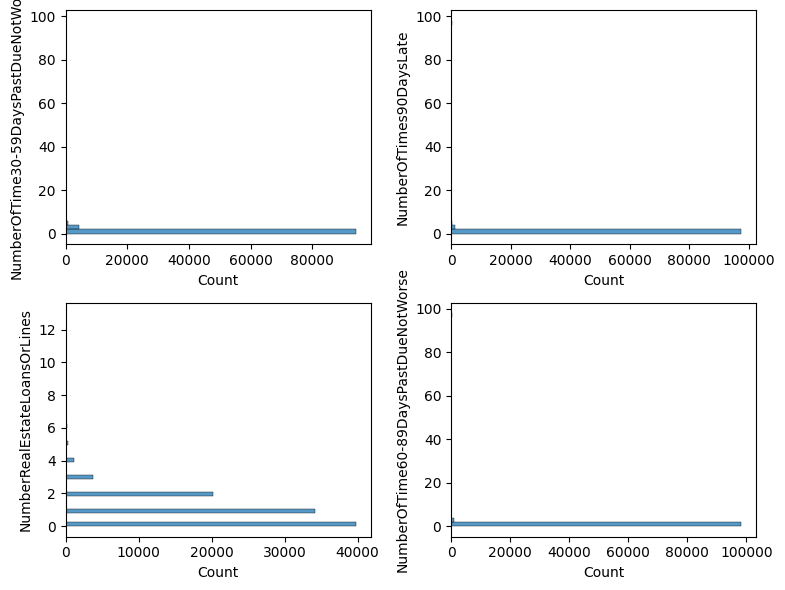

In [220]:
# Visualizing categorical features in histplot
plt.figure(figsize=(8,6))

for i,col in enumerate(X_cat_outlier_removed.columns):
    plt.subplot(2,2,i + 1)
    sns.histplot(y=col, data= X_cat_outlier_removed, bins = 50)
    #plt.ylabel('')

plt.tight_layout()

plt.show()

In [221]:
# Creating a clean categorical variable
X_cat_clean = X_cat_outlier_removed.copy()

In [222]:
print(X_num_clean.columns)
print(X_cat_clean.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfDependents'],
      dtype='object')
Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')


In [223]:
# concatenating numerical and categorical dataframes
X_train_df = pd.concat([X_num_clean,X_cat_clean], axis=1)
X_train_df.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,0.766127,45.0,0.802982,9120.0,13.0,2.0,2,0,6,0
1,0.957151,40.0,0.121876,2600.0,4.0,1.0,0,0,0,0
2,0.658180,38.0,0.085113,3042.0,2.0,0.0,1,1,0,0
3,0.233810,30.0,0.036050,3300.0,5.0,0.0,0,0,0,0
4,0.213179,74.0,0.375607,3500.0,3.0,1.0,0,0,1,0


In [224]:
# Perform train_test_split
Xpp_train, Xpp_test, ypp_train, ypp_test = train_test_split(X_train_df, y_df,
                                     test_size= 0.2,
                                     random_state = 42,
                                     stratify= y_df,
                                     )

In [225]:
print(Xpp_train.shape,ypp_train.shape)
print(Xpp_test.shape,ypp_test.shape)

(79635, 10) (79635,)
(19909, 10) (19909,)


In [226]:
Xpp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79635 entries, 57087 to 73112
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  79635 non-null  float64
 1   age                                   79635 non-null  float64
 2   DebtRatio                             79635 non-null  float64
 3   MonthlyIncome                         79635 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       79635 non-null  float64
 5   NumberOfDependents                    79635 non-null  float64
 6   NumberOfTime30-59DaysPastDueNotWorse  79635 non-null  int64  
 7   NumberOfTimes90DaysLate               79635 non-null  int64  
 8   NumberRealEstateLoansOrLines          79635 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  79635 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 6.7 MB


In [227]:
Xpp_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19909 entries, 5998 to 20225
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  19909 non-null  float64
 1   age                                   19909 non-null  float64
 2   DebtRatio                             19909 non-null  float64
 3   MonthlyIncome                         19909 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       19909 non-null  float64
 5   NumberOfDependents                    19909 non-null  float64
 6   NumberOfTime30-59DaysPastDueNotWorse  19909 non-null  int64  
 7   NumberOfTimes90DaysLate               19909 non-null  int64  
 8   NumberRealEstateLoansOrLines          19909 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  19909 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.7 MB


### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

In [228]:
values = np.array(ypp_train.value_counts())
labels = np.array([0,1])
print(labels, values)

[0 1] [74343  5292]


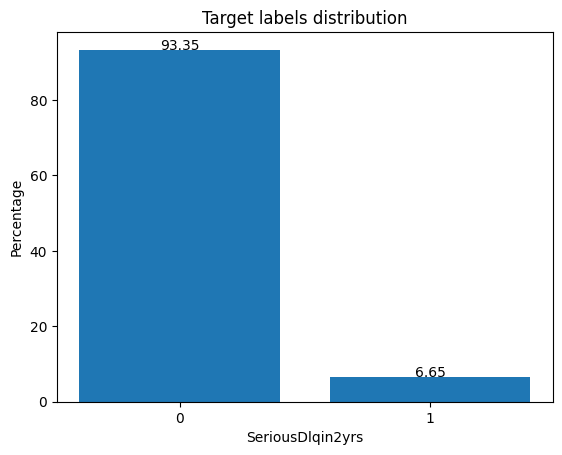

In [229]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha= 'center')
# calculating percentage
per_cent = np.round(values/values.sum() * 100,2)
# Plot bars
plt.bar(labels,per_cent)
plt.title('Target labels distribution')

# Adding values to the plot-bats
addlabels(labels,per_cent)

plt.xticks(labels)

plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Percentage')

plt.show()

#### Plot the distribution of SeriousDlqin2yrs by age

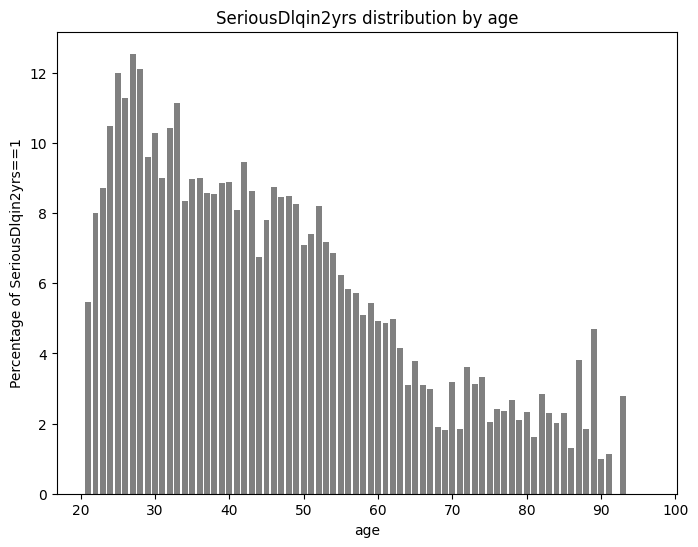

In [230]:
vals = ypp_train.groupby(Xpp_train['age'])
plt.subplots(figsize= (8,6))

for keys,values in vals:
    #print(values.count(),values.sum())
    dlq_percent = values.sum() / values.count() * 100
    plt.bar(keys,dlq_percent, color= 'grey')

plt.title('SeriousDlqin2yrs distribution by age')

plt.xlabel('age')
plt.ylabel('Percentage of SeriousDlqin2yrs==1')

plt.show()

#### Calculate the correlation and plot the heatmap

<Axes: >

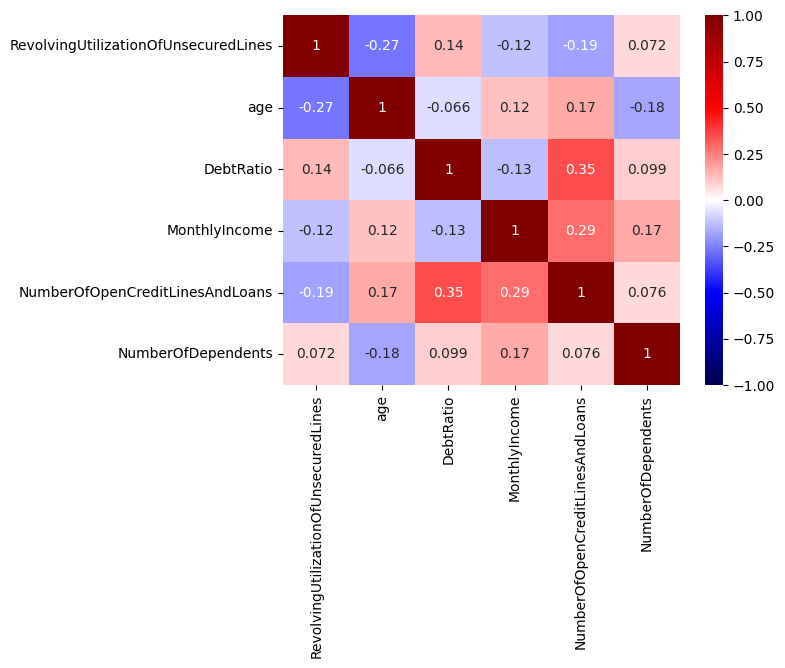

In [231]:
# Correlation among the numerical variables
corr_matrix = Xpp_train[numeric_vars].corr()
sns.heatmap(corr_matrix,
            annot= True,
            vmin= -1,
            vmax= 1,
            cmap= 'seismic')

In [232]:
Xpp_train_cat = Xpp_train.drop(columns= numeric_vars).copy()
Xpp_train_cat.columns

Index(['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

In [233]:
# correlation between categorical vars are found using chi-squared test
# Step 1: calculating the contingency table
contingency= pd.crosstab(ypp_train,
                        Xpp_train_cat['NumberOfTime30-59DaysPastDueNotWorse'])
contingency

NumberOfTime30-59DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,10,11,12,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,,
0,64154,7323,1811,598,214,92,34,15,8,1,1,0,1,1,90
1,2705,1187,660,332,178,81,31,14,3,2,2,1,1,4,91


In [234]:
# step 2: normalizing the contingency table
contingency_percent = pd.crosstab(ypp_train,
                    Xpp_train_cat['NumberOfTime30-59DaysPastDueNotWorse'],
                    normalize= 'index')
contingency_percent

NumberOfTime30-59DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,10,11,12,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,,
0,0.862946,0.098503,0.024360,0.008044,0.002879,0.001238,0.000457,0.000202,0.000108,0.000013,0.000013,0.000000,0.000013,0.000013,0.001211
1,0.511149,0.224301,0.124717,0.062736,0.033636,0.015306,0.005858,0.002646,0.000567,0.000378,0.000378,0.000189,0.000189,0.000756,0.017196


H0: `ypp_train` and `Xpp_train_cat['NumberOfTime30-59DaysPastDueNotWorse']` are NOT Correlated

H1: `ypp_train` and `Xpp_train_cat['NumberOfTime30-59DaysPastDueNotWorse']` are  Correlated.

alpha: 0.05

<Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='SeriousDlqin2yrs'>

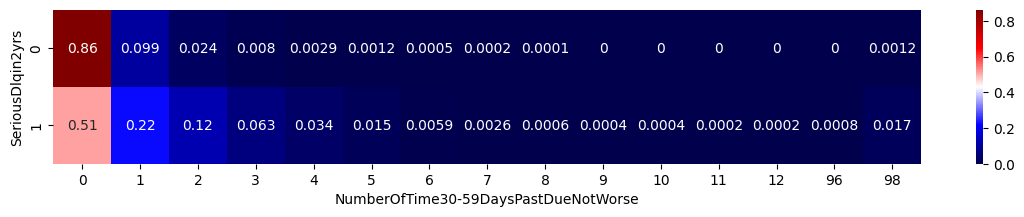

In [235]:
plt.figure(figsize=(14,2))
sns.heatmap(round(contingency_percent,4), annot=True, cmap='seismic')

In [236]:
# Step 3: perform chi-squre test
'''
    The chi2_contingency() function of scipy.stats module takes
    the contingency table element in 2d array format and it returns
    a tuple containing test statistics,  p-value, degrees of freedom,
    and expected table.
    chi2: The test statistic
    p: The p-value of the test
    dof: Degrees of freedom
    expected: The expected frequencies, based on the marginal sums of the table
'''

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency)

def interpret_p_value (p, alpha = 0.05):

    s = "p value is " + str(p)
    if p <= alpha:
        return s,'Correlated (reject H0)'
    else:
        return s, 'NOT Correlated (H0 holds true or accepted H0)'

interpret_p_value(p)

('p value is 0.0', 'Correlated (reject H0)')

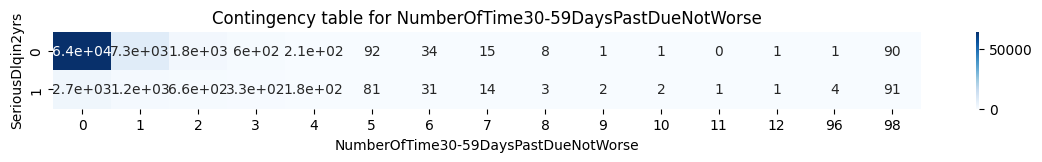

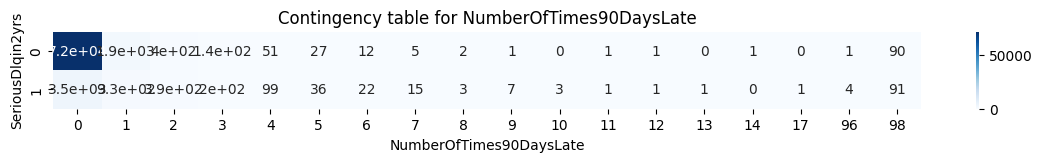

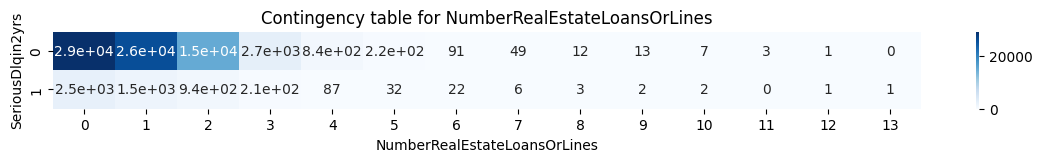

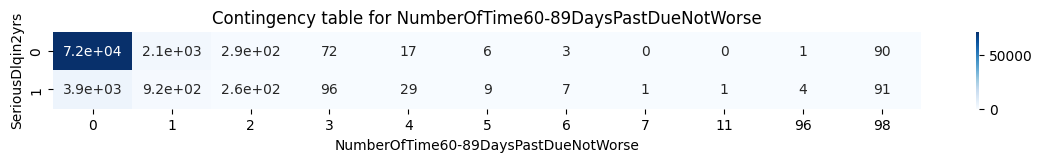

In [237]:
# checking dependencies of y_train with all X categorical columns:

interpret_cols =[]

for i,col in enumerate(Xpp_train_cat.columns):
    contingency = pd.crosstab(ypp_train,
                              X_cat_clean[col])

    plt.subplots(1,1,figsize=(14,1))
    sns.heatmap(contingency, annot=True, cmap='Blues')

    plt.title(f'Contingency table for {col}')
    chi2, p, dof, expected = chi2_contingency(contingency)
    interpret_cols.append([col,interpret_p_value(p)])



In [238]:
print('H0: y_train and X categorical columns are NOT correlated. \n'
'H1: y_train and X categorical columns are correlated. \n'
'alpha: 0.05 \n')
interpret_cols

H0: y_train and X categorical columns are NOT correlated. 
H1: y_train and X categorical columns are correlated. 
alpha: 0.05 



[['NumberOfTime30-59DaysPastDueNotWorse',
  ('p value is 0.0', 'Correlated (reject H0)')],
 ['NumberOfTimes90DaysLate', ('p value is 0.0', 'Correlated (reject H0)')],
 ['NumberRealEstateLoansOrLines',
  ('p value is 5.656435004079899e-45', 'Correlated (reject H0)')],
 ['NumberOfTime60-89DaysPastDueNotWorse',
  ('p value is 0.0', 'Correlated (reject H0)')]]

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [239]:

classifier = MonotonicBinning(force_bins= 10)

classifier.fit(Xpp_train,ypp_train)


MonotonicBinning(force_bins=11)

In [240]:
classifier.bins

{'RevolvingUtilizationOfUnsecuredLines': array([0.        , 0.00259473, 0.01925201, 0.04462458, 0.08786284,
        0.16464079, 0.28908879, 0.46466586, 0.71050855, 0.97971574,
        1.35215947]),
 'age': array([21., 31., 37., 43., 47., 52., 56., 60., 65., 72., 96.]),
 'DebtRatio': array([0.        , 0.01054392, 0.08445587, 0.15596384, 0.21888669,
        0.27849186, 0.34159125, 0.41450229, 0.51107798, 0.68747792,
        1.90676453]),
 'MonthlyIncome': array([    0. ,  2200. ,  3000. ,  3750. ,  4479.6,  5100. ,  6000. ,
         7000. ,  8301.2, 10261.2, 15509. ]),
 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  3.,  4.,  5.,  6.,  8.,  9., 10., 12., 14., 20.]),
 'NumberOfDependents': array([0., 1., 2.]),
 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]),
 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]),
 'NumberRealEstateLoansOrLines': array([ 0.,  1.,  2., 13.]),
 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.])}

In [241]:
woe_clf = WOE(mono_force_bins= 10)
woe_clf.fit(Xpp_train, ypp_train)

WOE(mono_custom_binning={'DebtRatio': array([0.        , 0.01054392, 0.08445587, 0.15596384, 0.21888669,
       0.27849186, 0.34159125, 0.41450229, 0.51107798, 0.68747792,
       1.90676453]),
                         'MonthlyIncome': array([    0. ,  2200. ,  3000. ,  3750. ,  4479.6,  5100. ,  6000. ,
        7000. ,  8301.2, 10261.2, 15509. ]),
                         'NumberOfDependents': array([0., 1., 2.]),
                         'NumberOfOpenCreditLinesAndLoans': array([ 0.,  3.,  4.,  5.,  6.,  8.,...
                      Interval(43.0, 47.0, closed='right'): 0.1964444257459983,
                      Interval(47.0, 52.0, closed='right'): 0.18452274149869038,
                      Interval(52.0, 56.0, closed='right'): -0.018070261908970764,
                      Interval(56.0, 60.0, closed='right'): -0.24053377684118368,
                      Interval(60.0, 65.0, closed='right'): -0.4745958893691649,
                      Interval(65.0, 72.0, closed='right'): -0.9621890223859291,
                      Interval(72.0, 96.0, closed='right'): -1.0340738524852646}})

In [242]:
woe_clf.woe_df.head()

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,RevolvingUtilizationOfUnsecuredLines,"(-0.001, 0.00259]",7964,215,7749,0.026996,0.973004,0.040627,0.104233,-0.942188,1.041045
1,RevolvingUtilizationOfUnsecuredLines,"(0.00259, 0.0193]",7963,109,7854,0.013688,0.986312,0.020597,0.105645,-1.634937,1.041045
2,RevolvingUtilizationOfUnsecuredLines,"(0.0193, 0.0446]",7964,111,7853,0.013938,0.986062,0.020975,0.105632,-1.616627,1.041045
3,RevolvingUtilizationOfUnsecuredLines,"(0.0446, 0.0879]",7963,156,7807,0.019591,0.980409,0.029478,0.105013,-1.270427,1.041045
4,RevolvingUtilizationOfUnsecuredLines,"(0.0879, 0.165]",7964,211,7753,0.026494,0.973506,0.039872,0.104287,-0.961484,1.041045


Text(0, 0.5, 'scores')

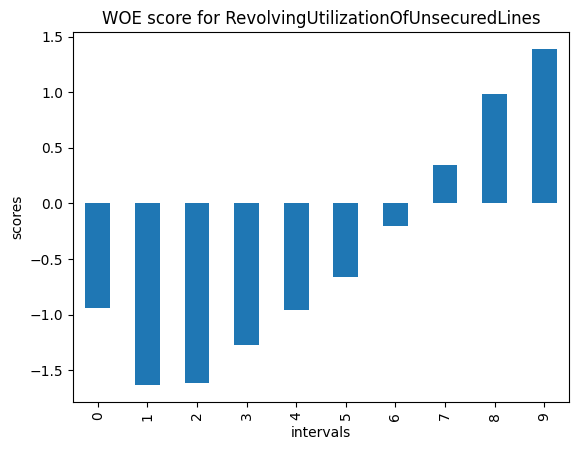

In [243]:
# Plot WOE and IV scores
data = woe_clf.woe_df[woe_clf.woe_df['Variable_Name']== 'RevolvingUtilizationOfUnsecuredLines']

data['WOE'].plot(kind= 'bar')
plt.title('WOE score for RevolvingUtilizationOfUnsecuredLines')
plt.xlabel('intervals')
plt.ylabel('scores')

['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']


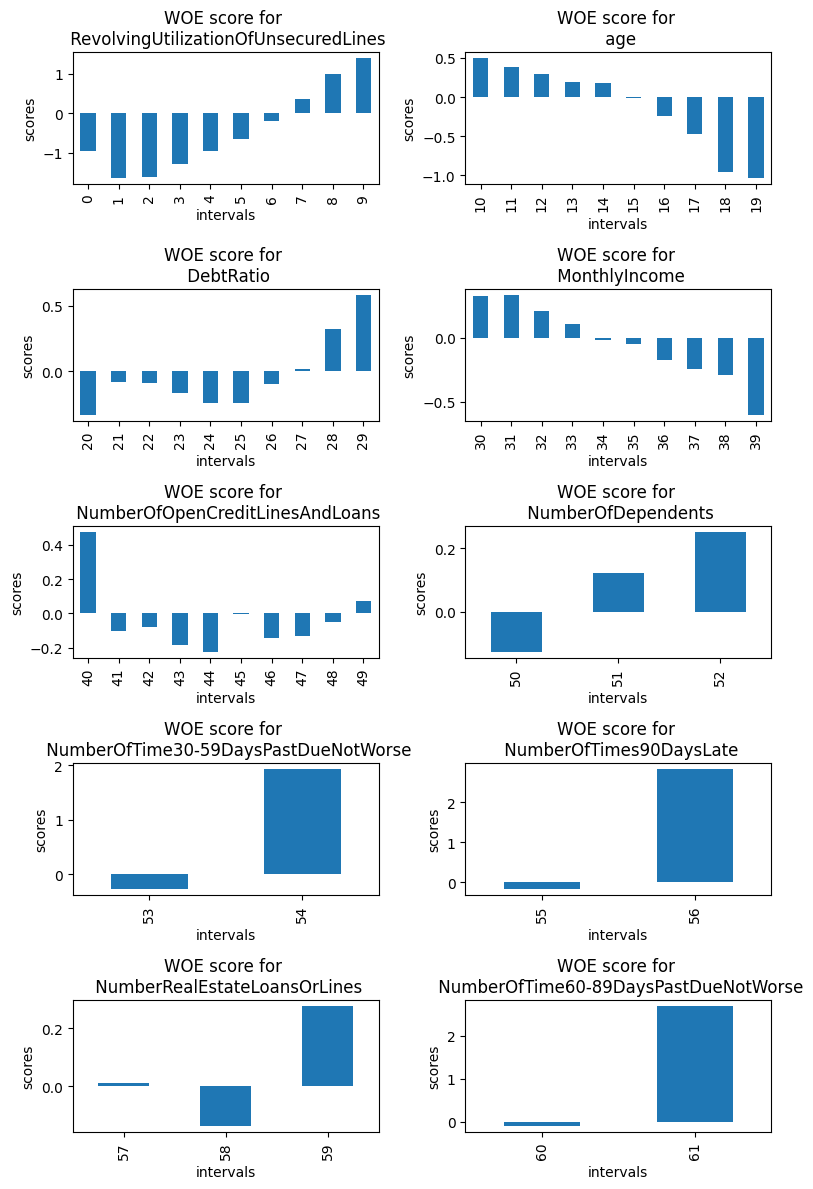

In [244]:
features = list(woe_clf.woe_df['Variable_Name'].unique())
print(features)
# Visualizing WOE_scores
plt.figure(figsize=(8,12))

for i,col in enumerate(features):
    data = woe_clf.woe_df[woe_clf.woe_df['Variable_Name']== col]
    plt.subplot(5,2,i + 1)
    data['WOE'].plot(kind= 'bar')
    plt.title(f'WOE score for \n {col}')
    plt.xlabel('intervals')
    plt.ylabel(f'scores')

plt.tight_layout()

plt.show()

In [245]:
# Information value scores summary
woe_clf.iv_df

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,1.041045
4,NumberOfTime30-59DaysPastDueNotWorse,0.495844
6,NumberOfTimes90DaysLate,0.467539
5,NumberOfTime60-89DaysPastDueNotWorse,0.244589
9,age,0.217949
0,DebtRatio,0.080883
1,MonthlyIncome,0.076490
3,NumberOfOpenCreditLinesAndLoans,0.056928
2,NumberOfDependents,0.024249
7,NumberRealEstateLoansOrLines,0.008316


<Axes: >

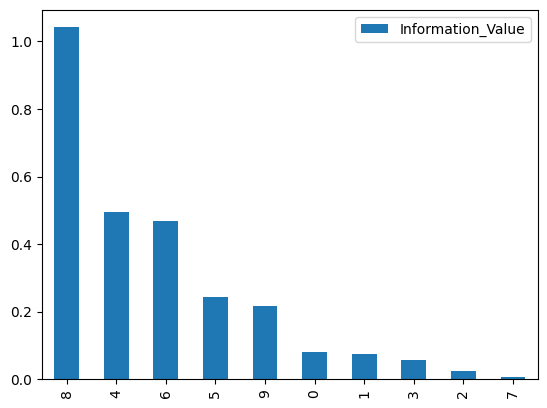

In [246]:
woe_clf.iv_df.plot(kind= 'bar')

In [247]:
Xpp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79635 entries, 57087 to 73112
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  79635 non-null  float64
 1   age                                   79635 non-null  float64
 2   DebtRatio                             79635 non-null  float64
 3   MonthlyIncome                         79635 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       79635 non-null  float64
 5   NumberOfDependents                    79635 non-null  float64
 6   NumberOfTime30-59DaysPastDueNotWorse  79635 non-null  int64  
 7   NumberOfTimes90DaysLate               79635 non-null  int64  
 8   NumberRealEstateLoansOrLines          79635 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  79635 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 6.7 MB


In [248]:
X_woe_train = woe_clf.transform(Xpp_train)

print(X_woe_train.shape, ypp_train.shape)


(79635, 10) (79635,)


In [249]:
Xpp_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfDependents                      0
NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
dtype: int64

In [250]:
Xpp_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
57087,0.058239,64.0,0.222417,6280.0,5.0,0.0,0,0,1,0
36267,0.100813,45.0,0.248621,3080.0,11.0,0.0,0,0,1,0
26274,0.001647,34.0,0.486241,4396.0,5.0,0.0,0,0,1,0
3597,0.045071,54.0,0.140203,13508.0,7.0,1.0,0,0,1,0
79097,0.546776,26.0,0.058610,2200.0,2.0,1.0,0,0,0,0


In [251]:
X_train_df.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfDependents                      0
NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
dtype: int64

In [252]:
#df_woe = woe_clf.transform(X_train_df)


In [253]:
#df_woe.head()

In [254]:
#df_woe.to_csv('df_woe.csv')

In [255]:
#y_df.to_csv('y_woe_df')

In [256]:
woe_test_clf = WOE(mono_force_bins= 10)
X_woe_test = woe_test_clf.fit_transform(Xpp_test, ypp_test)
print(X_woe_test.shape, ypp_test.shape)

(19909, 10) (19909,)


In [257]:
X_woe_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
57087,-1.270427,-0.474596,-0.245760,-0.173645,-0.080469,-0.126471,-0.267959,-0.171334,0.012448,-0.092784
36267,-0.961484,0.196444,-0.245760,0.215882,-0.134444,-0.126471,-0.267959,-0.171334,0.012448,-0.092784
26274,-0.942188,0.377483,0.019601,0.110190,-0.080469,-0.126471,-0.267959,-0.171334,0.012448,-0.092784
3597,-1.270427,-0.018070,-0.086644,-0.604963,-0.225197,0.122793,-0.267959,-0.171334,0.012448,-0.092784
79097,0.348990,0.496671,-0.079981,0.332101,0.473868,0.122793,-0.267959,-0.171334,0.012448,-0.092784


In [258]:
X_woe_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79635 entries, 57087 to 73112
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  79635 non-null  float64
 1   age                                   79635 non-null  float64
 2   DebtRatio                             79635 non-null  float64
 3   MonthlyIncome                         79635 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       79635 non-null  float64
 5   NumberOfDependents                    79635 non-null  float64
 6   NumberOfTime30-59DaysPastDueNotWorse  79635 non-null  float64
 7   NumberOfTimes90DaysLate               79635 non-null  float64
 8   NumberRealEstateLoansOrLines          79635 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  79635 non-null  float64
dtypes: float64(10)
memory usage: 6.7 MB


In [259]:
X_woe_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19909 entries, 5998 to 20225
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  19909 non-null  float64
 1   age                                   19909 non-null  float64
 2   DebtRatio                             19909 non-null  float64
 3   MonthlyIncome                         19909 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       19909 non-null  float64
 5   NumberOfDependents                    19909 non-null  float64
 6   NumberOfTime30-59DaysPastDueNotWorse  19909 non-null  float64
 7   NumberOfTimes90DaysLate               19909 non-null  float64
 8   NumberRealEstateLoansOrLines          19909 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  19909 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


### Identify features,  target and split it into train and test

In [260]:
# YOUR CODE HERE
# All features were included.
# Since chi-shared test shows correlation for all cat data.

In [261]:
'''
# Train test split using pre-pared features
X_train, X_val, y_train, y_val = train_test_split(Xpp_train, ypp_train,
                                                  test_size = 0.2,
                                                  random_state= 42)
'''

'\n# Train test split using pre-pared features\nX_train, X_val, y_train, y_val = train_test_split(Xpp_train, ypp_train,\n                                                  test_size = 0.2,\n                                                  random_state= 42)\n'

In [262]:

# Train test split using WOE features
X_train, X_val, y_train, y_val = train_test_split(X_woe_train, ypp_train,
                                                  test_size = 0.2,
                                                  random_state= 42,
                                                  stratify = ypp_train)


In [263]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(63708, 10) (63708,)
(15927, 10) (15927,)


### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

In [264]:
def sigmoidFunc (t):
    return np.maximum(np.minimum(1 / (1+np.exp(-t)),1),0)

In [265]:
def logisticRegPred (X, theta):
    t = X.dot(theta)
    p_hat = sigmoidFunc(t)
    return p_hat

In [266]:
def logisticReg_Predict (X, theta):
    t = X.dot(theta)
    p_hat = sigmoidFunc(t)
    return (p_hat > 0.5).astype(int)

In [267]:
def logisticCostFunc (X, Y, theta):
    m = len(Y)

    y_hat = logisticRegPred(X, theta)

    J = (np.sum(Y * np.log(y_hat) +
         (1-Y)* np.log(1-y_hat)))/m
    return J

In [268]:
def logisticCostFuncGrad (X, Y, theta):

    m = len(Y)

    # Hypothesis Values
    y_hat = logisticRegPred(X, theta)

    # Difference b/w Hypothesis and Actual Y
    loss = Y - y_hat

    del_J = X.T.dot(loss)/m
    return del_J

In [269]:
# Define Batch Gradient Algorithm
def batch_gradient_descent(X, Y, theta, eta, iterations):

    cost_history = [0] * iterations
    m = len(Y)


    for iteration in range(iterations):
        # Gradient Calculation
        cost_grad = logisticCostFuncGrad (X, Y, theta)
        # Changing Values of B using Gradient
        delta_theta = eta * cost_grad
        theta = theta - delta_theta
        # New Cost Value
        cost = logisticCostFunc(X, Y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [270]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix


# Initial Coefficients
R = X_train.shape[1]
theta = np.zeros(R)
eta = [0.005]
iter_ = 500
cost_history=[[_]]*len(eta)
for i,eta_i in enumerate(eta):
    new_theta, cost_history[i] = batch_gradient_descent(
        X_train, y_train.astype(np.float64), theta, eta_i, iter_)
    pred = logisticReg_Predict(X_val,new_theta)

    print(f'Learning rate: {eta_i}')
    print('\n *****Validation Scores***** \n')
    print('\\text{Precision score: }\n',precision_score(y_val, pred))
    print('\\text{Recall score: }\n',recall_score(y_val, pred))
    print('\\text{F1 score: }\n',f1_score(y_val,pred))
    print('\n *****Test Scores***** \n')
    pred = logisticReg_Predict(X_woe_test,new_theta) # using X_woe_test
    print('\\text{Precision score: }\n',precision_score(ypp_test, pred))
    print('\\text{Recall score: }\n',recall_score(ypp_test, pred))
    print('\\text{F1 score: }\n',f1_score(ypp_test,pred))
    print('accuracy',ypp_test==pred / len(pred))
    print('-'*20)


Learning rate: 0.005

 *****Validation Scores***** 

\text{Precision score: }
 0.026436885319859244
\text{Recall score: }
 0.276937618147448
\text{F1 score: }
 0.04826620541965242

 *****Test Scores***** 

\text{Precision score: }
 0.025862679798767094
\text{Recall score: }
 0.2758881330309902
\text{F1 score: }
 0.04729204457113242
accuracy 5998     False
25457    False
36284    False
73195    False
28756     True
         ...  
62468    False
59258    False
56610    False
48522    False
20225    False
Length: 19909, dtype: bool
--------------------


<Axes: >

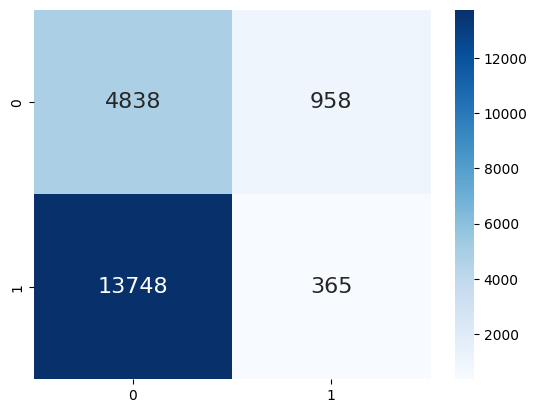

In [271]:
# Plot confusion metrics
sns.heatmap(confusion_matrix(pred,ypp_test), annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

\text{Solver: lbfgs}


 *****Validation Scores***** 

\text{Precision score: }
 0.5411255411255411
\text{Recall score: }
 0.11814744801512288
\text{F1 score: }
 0.19394879751745536

 *****Test Scores***** 

\text{Precision score: }
 0.5647058823529412
\text{Recall score: }
 0.10884353741496598
\text{F1 score: }
 0.18250950570342203


Text(0.5, 1.0, 'Without weightage')

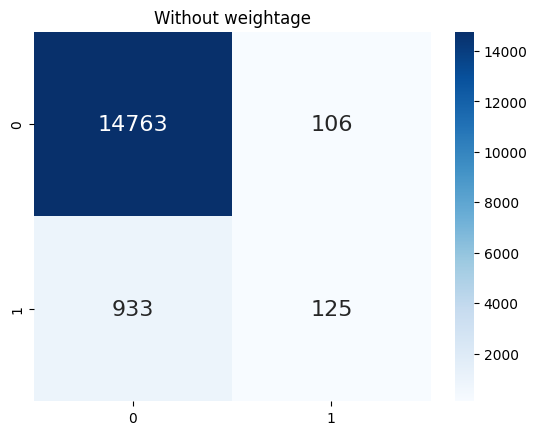

In [272]:
# Without weightage
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

# Predicting on the val data
pred_val = lr.predict(X_val)

print('\\text{Solver: lbfgs}\n',)

print('\n *****Validation Scores***** \n')
print('\\text{Precision score: }\n',precision_score(y_val, pred_val))
print('\\text{Recall score: }\n',recall_score(y_val, pred_val))
print('\\text{F1 score: }\n',f1_score(y_val,pred_val))

pred_test = lr.predict(X_woe_test)
print('\n *****Test Scores***** \n')
print('\\text{Precision score: }\n',precision_score(ypp_test, pred_test))
print('\\text{Recall score: }\n',recall_score(ypp_test, pred_test))
print('\\text{F1 score: }\n',f1_score(ypp_test,pred_test))

# Plotting confusion matrix
con_mat = confusion_matrix(y_val, pred_val)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
plt.title('Without weightage')

\text{Solver: newton-cg}


 *****Validation Scores***** 

\text{Precision score: }
 0.17586769159096202
\text{Recall score: }
 0.7136105860113422
\text{F1 score: }
 0.28219024481405347

 *****Test Scores***** 

\text{Precision score: }
 0.18704623614826138
\text{Recall score: }
 0.7399848828420257
\text{F1 score: }
 0.2986121701997865


Text(0.5, 1.0, 'With Class weightage')

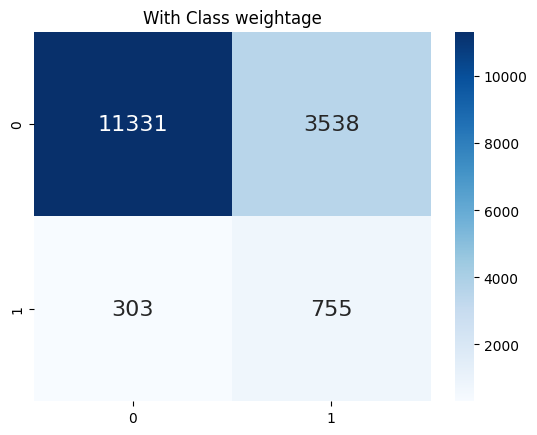

In [273]:
# With Class weightage
# Without weightage
#importing and training the model
from sklearn.linear_model import LogisticRegression
bal_clf_lr = LogisticRegression(solver='newton-cg', class_weight= 'balanced')
bal_clf_lr.fit(X_train, y_train)

# Predicting on the test data
pred_val = bal_clf_lr.predict(X_val)

print('\\text{Solver: newton-cg}\n',)

print('\n *****Validation Scores***** \n')
print('\\text{Precision score: }\n',precision_score(y_val, pred_val))
print('\\text{Recall score: }\n',recall_score(y_val, pred_val))
print('\\text{F1 score: }\n',f1_score(y_val,pred_val))

pred_test = bal_clf_lr.predict(X_woe_test)
print('\n *****Test Scores***** \n')
print('\\text{Precision score: }\n',precision_score(ypp_test, pred_test))
print('\\text{Recall score: }\n',recall_score(ypp_test, pred_test))
print('\\text{F1 score: }\n',f1_score(ypp_test,pred_test))

# Plotting confusion matrix
con_mat = confusion_matrix(y_val, pred_val)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
plt.title('With Class weightage')


C=10.00
Sparsity with L1 penalty:                0.00%
Sparsity with Elastic-Net penalty:       0.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.94
Score with Elastic-Net penalty:          0.94
Score with L2 penalty:                   0.94
C=1.00
Sparsity with L1 penalty:                0.00%
Sparsity with Elastic-Net penalty:       0.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.94
Score with Elastic-Net penalty:          0.94
Score with L2 penalty:                   0.94
C=0.10
Sparsity with L1 penalty:                10.00%
Sparsity with Elastic-Net penalty:       10.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.94
Score with Elastic-Net penalty:          0.94
Score with L2 penalty:                   0.94
C=0.01
Sparsity with L1 penalty:                30.00%
Sparsity with Elastic-Net penalty:       30.00%
Sparsity with L2 penalty:           

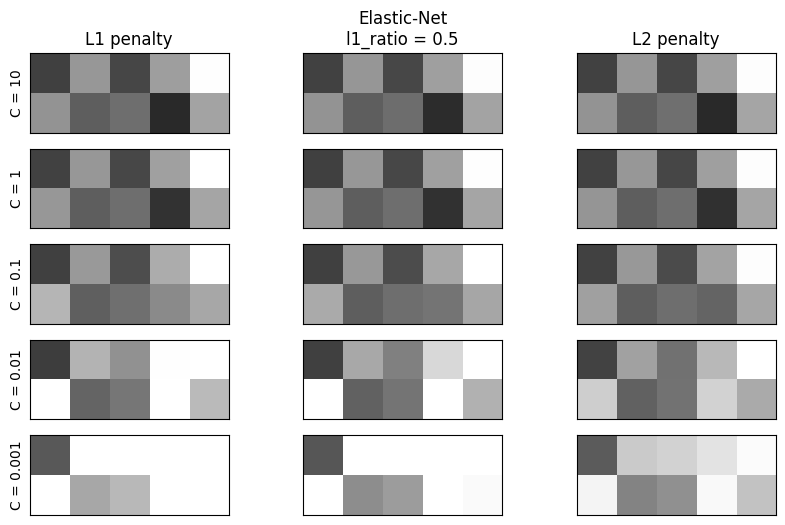

In [274]:
# L1 Penalty and Sparsity in Logistic Regression
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#l1-penalty-and-sparsity-in-logistic-regression
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause
X, y = X_train, y_train

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(5, 3, figsize= (10,6))

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((10, 1, 0.1, 0.01, 0.001), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X, y)))
    print(
        "{:<40} {:.2f}".format("Score with Elastic-Net penalty:", clf_en_LR.score(X, y))
    )
    print("{:<40} {:.2f}".format("Score with L2 penalty:", clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(2,5)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel("C = %s" % C)

plt.show()

### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [275]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [276]:
# Champion classifier is bal_clf_lr
beta_i = bal_clf_lr.coef_.ravel()
alpha = bal_clf_lr.intercept_
data = woe_clf.woe_df
features = list(data['Variable_Name'].unique())
n = X_woe_train.shape[1]
print(beta_i,'\n',alpha,'\n',n,'\n',features,'\n')
scores = []
score = 0.0
for i,fet in enumerate(features):

    WOE_i = data[data['Variable_Name']== fet]['WOE'].to_numpy()
    print(WOE_i)
    score = offset / n - (beta_i[i] * WOE_i) * factor / n
    scores.append(score)

scale_scores_bins = dict(zip(features,scores))
print(scale_scores_bins)


[0.75659843 0.43526018 0.7463324  0.40123647 0.13049163 0.36965939
 0.73154054 0.65434989 0.92688377 0.56679017] 
 [0.01831314] 
 10 
 ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'] 

[-0.94218778 -1.63493708 -1.61662743 -1.27042677 -0.96148374 -0.65843466
 -0.20611632  0.34899039  0.98138448  1.38989174]
[ 0.4966713   0.37748287  0.29705062  0.19644443  0.18452274 -0.01807026
 -0.24053378 -0.47459589 -0.96218902 -1.03407385]
[-0.33467395 -0.07998058 -0.08664449 -0.16326711 -0.24575984 -0.24562728
 -0.09968436  0.01960088  0.32321795  0.58086801]
[ 0.3321009   0.33670903  0.21588237  0.1101898  -0.01334629 -0.04790356
 -0.17364543 -0.24759059 -0.28919663 -0.60496349]
[ 0.47386752 -0.1051979  -0.08046867 -0.18413073 -0.2251971  -0.00254136
 -0.14495218 -0.13444355

In [277]:
scores_actual = offset - beta_i.dot(X_woe_test.T) * factor

In [278]:
pd.DataFrame(scores_actual, columns= ['Scores'])

,Scores
0,530.835257
1,525.222332
2,470.516474
3,515.651126
4,487.357147
...,...
19904,506.101909
19905,503.382882
19906,491.702531
19907,509.732408


In [279]:
X_woe_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
57087,-1.270427,-0.474596,-0.245760,-0.173645,-0.080469,-0.126471,-0.267959,-0.171334,0.012448,-0.092784
36267,-0.961484,0.196444,-0.245760,0.215882,-0.134444,-0.126471,-0.267959,-0.171334,0.012448,-0.092784
26274,-0.942188,0.377483,0.019601,0.110190,-0.080469,-0.126471,-0.267959,-0.171334,0.012448,-0.092784
3597,-1.270427,-0.018070,-0.086644,-0.604963,-0.225197,0.122793,-0.267959,-0.171334,0.012448,-0.092784
79097,0.348990,0.496671,-0.079981,0.332101,0.473868,0.122793,-0.267959,-0.171334,0.012448,-0.092784


### Performance Metrics (1 point)

In [280]:
from sklearn.metrics import precision_score,recall_score,classification_report,confusion_matrix

In [281]:
y_pred = bal_clf_lr.predict(X_woe_train)

In [282]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

#### Precision

In [283]:
precision_score(ypp_train,y_pred)

0.18085855031667838

#### Recall

In [284]:
recall_score(ypp_train,y_pred)

0.7284580498866213

In [285]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(ypp_train,y_pred)
print(precisions, recalls, thresholds)

[0.06645319 0.18085855 1.        ] [1.         0.72845805 0.        ] [0 1]


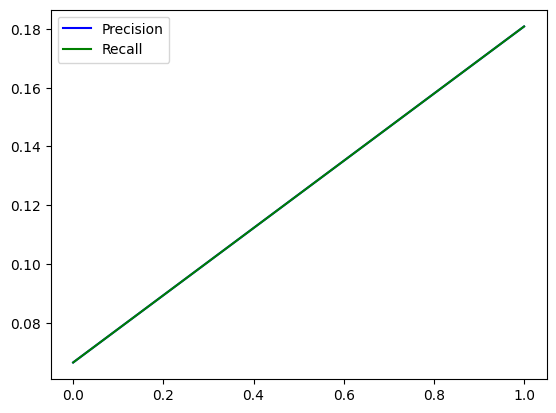

In [286]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b', label= 'Precision')
    plt.plot(thresholds, precisions[:-1], 'g', label= 'Recall')
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [299]:
# Plotting ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ypp_train, y_pred, pos_label=1)
roc_auc = roc_auc_score(ypp_train, y_pred)

# roc curve for tpr = fpr
random_probs = np.random.rand(ypp_train.shape[0])
p_fpr, p_tpr, _ = roc_curve(ypp_train, random_probs, pos_label=1)

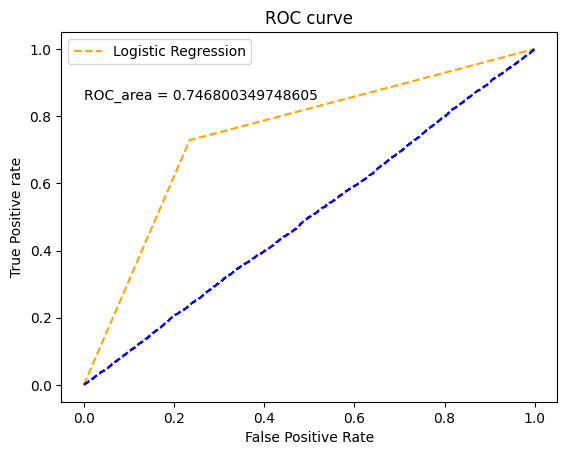

In [302]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle="--", color="orange", label="Logistic Regression")

plt.plot(p_fpr, p_tpr, linestyle="--", color="blue")
# title
plt.title("ROC curve")
# x label
plt.xlabel("False Positive Rate")
# y label
plt.ylabel("True Positive rate")
plt.text(0,0.85,f'ROC_area = {roc_auc}')
plt.legend(loc="best")
plt.savefig("ROC", dpi=300)
plt.show()

#### Classification Report

In [288]:
print(classification_report(ypp_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     74343
           1       0.18      0.73      0.29      5292

    accuracy                           0.76     79635
   macro avg       0.58      0.75      0.57     79635
weighted avg       0.92      0.76      0.82     79635



#### Confusion matrix

<Axes: >

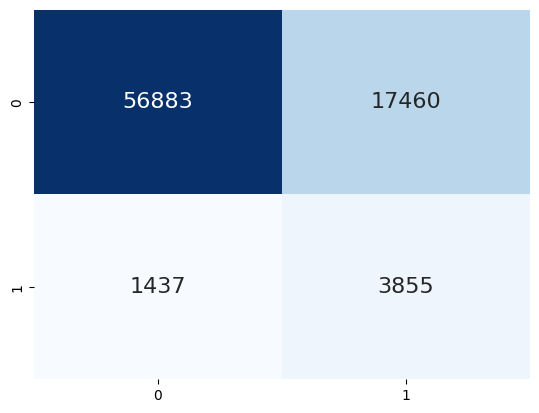

In [289]:
con_mat = confusion_matrix(ypp_train,y_pred)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar= False)

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations

Regression experiments:

|Sl. No.|Classifier name|Changed variable| metrics|Remarks|
|---|---|---|---|---|
|1.|Manual Logistic Regression with Batch Gradient descent |iterations = $500$|$$ \
\text{Learning rate: }0.005 \
\\
 *****Validation Scores***** \
\\
\text{Precision score: }\
 0.027795155956743228\\
\text{Recall score: }\
 0.2850595783684693\\
\text{F1 score: }\
 0.05065146579804561\
\\
 *****Test Scores***** \
\\
\text{Precision score: }\
 0.02586634540429452\\
\text{Recall score: }\
 0.2758881330309902\\
\text{F1 score:} \
 0.047298172865103016 $$| WOE transformed data was used|
|2.|Manual Logistic Regression with Batch Gradient descent |iterations = $500$|$$ \
\text{Learning rate: }0.005\
\\
 *****Validation Scores***** \
\\
\text{Precision score: }\
 0.06850003139323162\\
\text{Recall score: }\
 1.0\\
\text{F1 score: }\
 0.12821718180749794\
\\
 *****Test Scores***** \
\
\text{Precision score: }\
 0.06645235822994626\\
\text{Recall score: }\
 1.0\\
\text{F1 score: }\
 0.12462321024868124\
$$| plain Pre-Processed data was used|
|3.|sklearn Logistic Regression |None|$$ \
\text{Solver: newton-cg}\
\\
 *****Validation Scores***** \
\
\text{Precision score: }\
 0.5555555555555556\\
\text{Recall score: }\
 0.10999083409715857\\
\text{F1 score: }\
 0.1836266258607498\\
\
 *****Test Scores***** \
\\
\text{Precision score: }\
 0.5645161290322581\\
\text{Recall score: }\
 0.10582010582010581\\
\text{F1 score: }\
 0.17823042647994905\\
$$| WOE data was used|
|4.|sklearn Logistic Regression |None|$$ \
\text{Solver: saga}\\
\
 *****Validation Scores***** \
\\
\text{Precision score: }\
 0.5555555555555556\\
\text{Recall score: }\
 0.10999083409715857\\
\text{F1 score: }\
 0.1836266258607498\\
\
 *****Test Scores***** \
\\
\text{Precision score: }\
 0.5645161290322581\\
\text{Recall score: }\
 0.10582010582010581\\
\text{F1 score: }\
 0.17823042647994905\\
$$| WOE data was used|
|5.|sklearn Logistic Regression |With calss weightage|$$ \
\text{Solver: newton-cg}\\
\
 *****Validation Scores***** \
\\
\text{Precision score: }\
 0.1829909221213569\\
\text{Recall score: }\
 0.7021081576535289\\
\text{F1 score: }\
 0.2903164676899754\\
\
 *****Test Scores***** \
\\
\text{Precision score: }\
 0.18623326959847036\\
\text{Recall score: }\
 0.7362055933484505\\
\text{F1 score: }\
 0.2972684266748054\\
$$| WOE data was used|
